In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('physio_data_all.csv')

In [3]:
parameters = ['HR', 'HRV', 'SCL', 'SCR']

In [4]:
# Set the threshold for identifying outliers
z_score_threshold = 3
IQR_threshold = 1.5

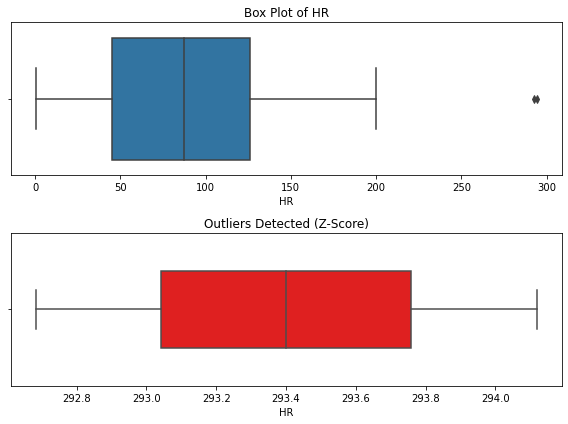

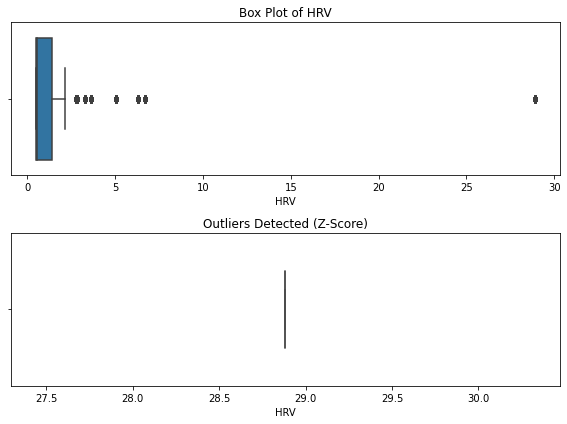

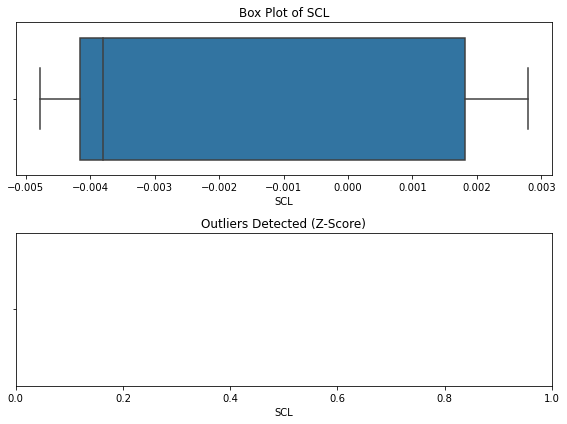

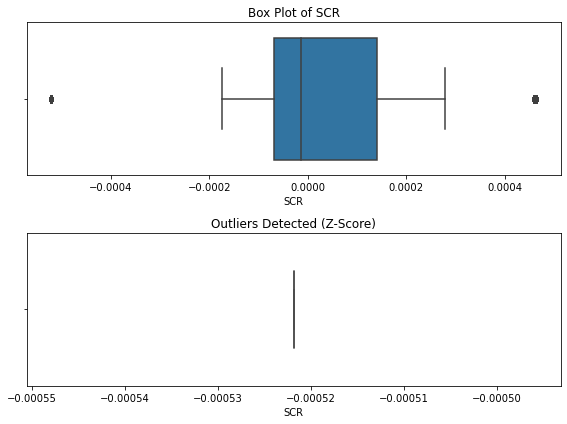

In [5]:
# Detect and visualize outliers for each parameter
for parameter in parameters:
    # Calculate z-scores for the parameter
    z_scores = np.abs((data[parameter] - data[parameter].mean()) / data[parameter].std())

    # Identify outliers using z-scores
    outliers_zscore = data[z_scores > z_score_threshold]

    # Calculate the interquartile range (IQR) for the parameter
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using IQR
    outliers_IQR = data[(data[parameter] < Q1 - IQR_threshold * IQR) | (data[parameter] > Q3 + IQR_threshold * IQR)]

    # Visualize outliers using box plots
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    sns.boxplot(x=data[parameter])
    plt.title('Box Plot of {}'.format(parameter))
    plt.xlabel(parameter)

    plt.subplot(2, 1, 2)
    sns.boxplot(x=outliers_zscore[parameter], color='red', width=0.5)
    plt.title('Outliers Detected (Z-Score)')
    plt.xlabel(parameter)

    plt.tight_layout()
    plt.show()

In [6]:
# Detect and remove outliers for HR
hr_outliers = data[(data['HR'] - data['HR'].mean()) / data['HR'].std() > z_score_threshold]
data = data.drop(hr_outliers.index)

In [7]:
# Detect and remove outliers for HRV
hrv_outliers = data[(data['HRV'] - data['HRV'].mean()) / data['HRV'].std() > z_score_threshold]
data = data.drop(hrv_outliers.index)

In [8]:
# Detect and remove outliers for SCL
scl_outliers = data[(data['SCL'] - data['SCL'].mean()) / data['SCL'].std() > z_score_threshold]
data = data.drop(scl_outliers.index)

In [9]:
# Detect and remove outliers for SCR
scr_outliers = data[(data['SCR'] - data['SCR'].mean()) / data['SCR'].std() > z_score_threshold]
data = data.drop(scr_outliers.index)

<AxesSubplot:>

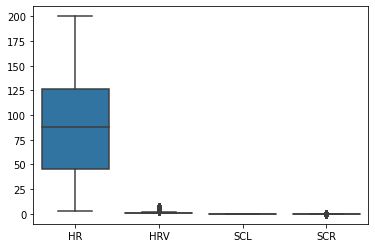

In [10]:
sns.boxplot(data=data[['HR', 'HRV', 'SCL', 'SCR']])